# Car price predictions

## Goal
**Build a model to predict car prices based on columns being filtered out. Will focus on both unvariate & multivariate models**

## Dataset
**The data is quite popular as it is one of datasets in UCI machine learning repository. <a href='https://archive.ics.uci.edu/ml/datasets/automobile'>This page</a> contains information about the data**

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
warnings.filterwarnings("ignore")
%matplotlib inline

**import and format data**

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars=pd.read_csv("imports-85.data",names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Preprocessing

Filter out only numeric valus

In [4]:
numeric_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = cars[numeric_values_cols]

In [6]:
df.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


**Data cleaning**

In [8]:
df=df.replace("?", np.nan)

In [9]:
#Convert all data type to float
df=df.astype('float')

In [11]:
#Check how many rows having null values
df.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Drop rows where price is null

In [12]:
df.dropna(subset=['price'], inplace=True)
df.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For the rest, replace any null values using the mean value of that column

In [13]:
df=df.fillna(df.mean())

In [14]:
df.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Data Normalization**

Data is largly scaled, so normalizing data is a must

In [16]:
#Drop 'price' column
df_X=df.drop('price',axis=1)

#Normnalize the data
df_norm=(df_X-df_X.min()) / (df_X.max()-df_X.min())

df_norm['price']=df['price']

In [17]:
df_norm.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125,0.495327,0.346939,0.166667,0.263158,16500.0


In [18]:
len(df_norm)

201

## Model Constructions

**Unvariate model, only use one feature to trtain the model**

In [27]:
def knn_train_test(train_col,target_col, df):
    #Instantiate KNN 
    knn=KNeighborsRegressor()
    
    #Shuffule and randomnize the data order
    np.random.seed(0)
    new_index=np.random.permutation(df.index)
    df_rand=df.reindex(new_index)
    
    #Split the data
    bound=int(len(df_rand)*0.6)
    train_set=df_rand.iloc[0:bound]
    test_set=df_rand.iloc[bound:]
    
    #Fit the model
    knn.fit(train_set[[train_col]], train_set[[target_col]])
    
    # Predict the results
    predictions=knn.predict(test_set[[train_col]])
    
    #Calculate the RMSE
    mse=mean_squared_error(test_set[target_col], predictions)
    rmse=np.sqrt(mse)
    
    return rmse

In [30]:
#loop over all columns to calculate the rmse, storing it to a dictionary
rmse_col={}
train_col=df_norm.columns.drop('price')

for col in train_col:
    rmse_val=knn_train_test(col, 'price', df_norm)
    rmse_col[col]=rmse_val

#Convert the dictionary to a series
rmse_results=pd.Series(rmse_col)
rmse_results.sort_values()

curb-weight          4016.389640
highway-mpg          4183.634006
width                4263.847438
length               4387.666434
horsepower           4467.797166
city-mpg             4968.818877
compression-rate     5491.842830
bore                 6148.201665
normalized-losses    6423.014936
wheel-base           6532.097315
stroke               6757.657392
height               7129.150144
peak-rpm             7238.324949
dtype: float64

By using the default K values, **curb-weight** performs best

Update the function by adding a list of K values

In [33]:
def knn_train_test(train_col,target_col, df):
    
   
    
    #Shuffule and randomnize the data order
    np.random.seed(0)
    new_index=np.random.permutation(df.index)
    df_rand=df.reindex(new_index)
    
    #Split the data
    bound=int(len(df_rand)*0.6)
    train_set=df_rand.iloc[0:bound]
    test_set=df_rand.iloc[bound:]
    
    #Build the model
    k_list=[1,3,5,7,9]
    k_rmses={}
    
    for k in k_list:
        knn=KNeighborsRegressor(n_neighbors=k)  
        knn.fit(train_set[[train_col]], train_set[[target_col]])
        predictions=knn.predict(test_set[[train_col]])
        mse=mean_squared_error(test_set[target_col], predictions)
        rmse=np.sqrt(mse)
        k_rmses[k]=rmse

    return k_rmses

In [35]:
rmse_col={}
train_col=df_norm.columns.drop('price')
for col in train_col:
    rmse_val=knn_train_test(col, 'price', df_norm)
    rmse_col[col]=rmse_val
    
rmse_col

{'normalized-losses': {1: 6686.914847135375,
  3: 6043.335046951471,
  5: 6423.014936082261,
  7: 6965.335591194382,
  9: 7278.612273531975},
 'wheel-base': {1: 4532.045639555316,
  3: 6470.147998150415,
  5: 6532.097314675821,
  7: 5640.38720062645,
  9: 5427.170404398999},
 'length': {1: 4384.721104071938,
  3: 3852.0384504303643,
  5: 4387.666434196859,
  7: 4625.2723688739225,
  9: 4515.666382941744},
 'width': {1: 5217.8048042552,
  3: 3833.959157538526,
  5: 4263.847437569056,
  7: 4161.477133479973,
  9: 4060.235793988966},
 'height': {1: 8965.718365109911,
  3: 7425.717750476338,
  5: 7129.150143661178,
  7: 6825.842559938021,
  9: 6889.0062510578955},
 'curb-weight': {1: 6335.4936578682555,
  3: 4726.828736766495,
  5: 4016.3896396860923,
  7: 3995.1701228365287,
  9: 4067.6236999313564},
 'bore': {1: 6590.718850244104,
  3: 6315.718183021828,
  5: 6148.20166464437,
  7: 6286.640486055094,
  9: 6335.68920170253},
 'stroke': {1: 8378.632124872807,
  3: 5986.5051317717725,
  5: 

Visualize the results

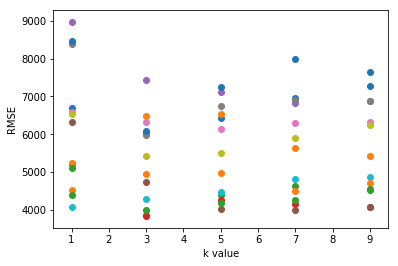

In [38]:
for key,val in rmse_col.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

Compute the average RMSE values for eachj column

In [39]:
avg_rmse_col={}
for key, val in rmse_col.items():
    avg_rmse=np.mean(list(val.values()))
    avg_rmse_col[key]=avg_rmse
    
unvariate_avg_rmse=pd.Series(avg_rmse_col)
unvariate_avg_rmse.sort_values()

width                4307.464865
length               4353.072948
highway-mpg          4419.551602
horsepower           4493.451228
curb-weight          4628.301171
city-mpg             4868.270441
wheel-base           5720.369711
compression-rate     5917.736149
bore                 6335.393677
normalized-losses    6679.442539
stroke               6982.038454
height               7447.087014
peak-rpm             7489.148115
dtype: float64

**"Width"** scores lowest 

**Multivariate Models**

Add more and more columns using default k values to see the model performance

In [41]:
# Slightly modify the function
def knn_train_test(train_col,target_col, df):
      
    #Shuffule and randomnize the data order
    np.random.seed(0)
    new_index=np.random.permutation(df.index)
    df_rand=df.reindex(new_index)
    
    #Split the data
    bound=int(len(df_rand)*0.6)
    train_set=df_rand.iloc[0:bound]
    test_set=df_rand.iloc[bound:]
    
    #Build the model
    k_list=[5]
    k_rmses={}
    
    for k in k_list:
        knn=KNeighborsRegressor(n_neighbors=k)  
        knn.fit(train_set[train_col], train_set[target_col])
        predictions=knn.predict(test_set[train_col])
        mse=mean_squared_error(test_set[target_col], predictions)
        rmse=np.sqrt(mse)
        k_rmses[k]=rmse

    return k_rmses

In [45]:
#Add 2 best features according to average rmse values, up to 5 features
two_features=['width','length']
three_features=['width','length','highway-mpg']
four_features=['width','length','highway-mpg','horsepower']
five_features=['width','length','highway-mpg','horsepower','curb-weight']

multi_rmse={}

#Call the function to get related rmse
rmse_two_features=knn_train_test(two_features, 'price', df_norm)
multi_rmse["two features"]=rmse_two_features

rmse_three_features=knn_train_test(three_features, 'price', df_norm)
multi_rmse["three features"]=rmse_three_features

rmse_four_features=knn_train_test(four_features, 'price', df_norm)
multi_rmse["four features"]=rmse_four_features

rmse_five_features=knn_train_test(five_features, 'price', df_norm)
multi_rmse["five features"]=rmse_five_features

multi_rmse

{'two features': {5: 4620.132012383613},
 'three features': {5: 4365.0952383088015},
 'four features': {5: 3087.687800696162},
 'five features': {5: 3546.388454139552}}

When having four columns :**'width','length','highway-mpg','horsepower'** together, RMSE scores lowest

Next take various K values into consideration and repeate the process

In [46]:
def knn_train_test(train_col,target_col, df):
      
    #Shuffule and randomnize the data order
    np.random.seed(0)
    new_index=np.random.permutation(df.index)
    df_rand=df.reindex(new_index)
    
    #Split the data
    bound=int(len(df_rand)*0.6)
    train_set=df_rand.iloc[0:bound]
    test_set=df_rand.iloc[bound:]
    
    #Build the model
    k_list=list(range(1,26))
    k_rmses={}
    
    for k in k_list:
        knn=KNeighborsRegressor(n_neighbors=k)  
        knn.fit(train_set[train_col], train_set[target_col])
        predictions=knn.predict(test_set[train_col])
        mse=mean_squared_error(test_set[target_col], predictions)
        rmse=np.sqrt(mse)
        k_rmses[k]=rmse

    return k_rmses

In [48]:
multi_rmse={}

#Call the function to get related rmse
rmse_two_features=knn_train_test(two_features, 'price', df_norm)
multi_rmse["two features"]=rmse_two_features

rmse_three_features=knn_train_test(three_features, 'price', df_norm)
multi_rmse["three features"]=rmse_three_features

rmse_four_features=knn_train_test(four_features, 'price', df_norm)
multi_rmse["four features"]=rmse_four_features

rmse_five_features=knn_train_test(five_features, 'price', df_norm)
multi_rmse["five features"]=rmse_five_features

multi_rmse

{'two features': {1: 4507.719170873092,
  2: 4412.177489000691,
  3: 4649.485139424407,
  4: 4728.485295913782,
  5: 4620.132012383613,
  6: 4609.672404590223,
  7: 4433.966876656895,
  8: 4272.690488939574,
  9: 4281.182256282415,
  10: 4371.243855847435,
  11: 4422.871247162024,
  12: 4435.898976419007,
  13: 4383.568349169282,
  14: 4376.325998975297,
  15: 4396.715889140629,
  16: 4414.142203426591,
  17: 4396.755756350217,
  18: 4469.774323882534,
  19: 4525.877863994281,
  20: 4545.376041462628,
  21: 4440.096882526627,
  22: 4381.375310981355,
  23: 4420.424806041667,
  24: 4417.50741353162,
  25: 4426.27791772704},
 'three features': {1: 4068.1131307332694,
  2: 4191.3156428383245,
  3: 4458.285133388156,
  4: 4339.413616015901,
  5: 4365.0952383088015,
  6: 4483.834936677419,
  7: 4292.125734203994,
  8: 4169.729001805197,
  9: 4219.809493208155,
  10: 4339.376196194422,
  11: 4461.28693037047,
  12: 4653.741585590685,
  13: 4656.071375977038,
  14: 4661.462086264678,
  15: 44

Visualize thr result

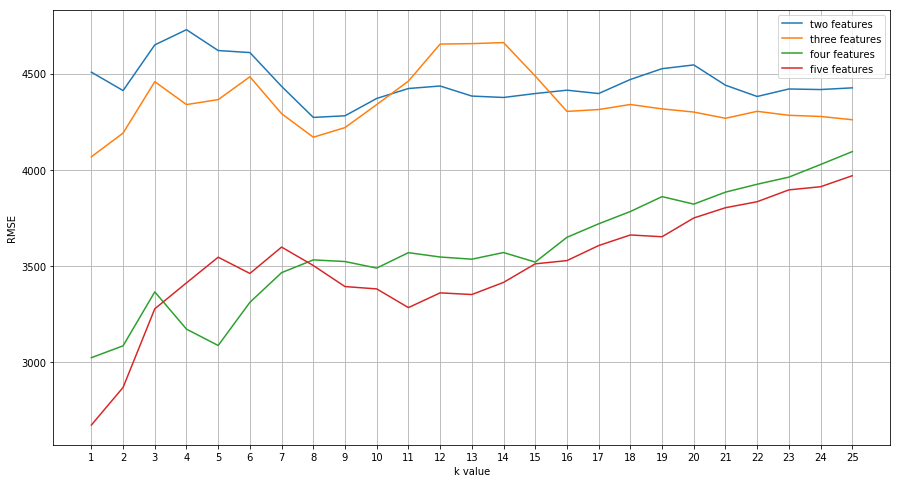

In [49]:
plt.figure(figsize=(15,8))
for key,val in multi_rmse.items():
    x = list(val.keys())
    y = list(val.values())
   
    labels=[key for key in multi_rmse.keys()]
   
    plt.plot(x, y)
        
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(labels)
    plt.xticks(range(1,26))
    plt.grid(True)
    
plt.show()   

Compute average RMSE for each model

In [50]:
avg_rmse_col={}
for key, val in multi_rmse.items():
    avg_rmse=np.mean(list(val.values()))
    avg_rmse_col[key]=avg_rmse
    
multivariate_avg_rmse=pd.Series(avg_rmse_col)
multivariate_avg_rmse.sort_values()

five features     3506.539520
four features     3581.513290
three features    4352.658205
two features      4453.589759
dtype: float64

Model with five features scores best here, and it looks like rmse scores lowest when value of K is 1.<br>
Next Apply K-Fold validation to see how model score accurately

## Validations

**K-Fold validation**

In [52]:
#set up 10 folders
kf=KFold(n_splits=10, shuffle=True, random_state=1)


knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(df_norm[five_features], df_norm['price'])

#Pass knn into cross_val_score
mses=cross_val_score(knn, X=df_norm[five_features], y=df_norm['price'],
                     scoring='neg_mean_squared_error', cv=kf)

#convert results into rmse
rmse=np.sqrt(np.absolute(mses))
avg_rmse=np.mean(rmse)

print(rmse)
print("\n")
print("Average RMSE: ",avg_rmse)

[1529.84308252 2690.02355938 3705.68651534 2440.46075568 3135.82749047
 2101.47052085 3437.43373027 2874.83833459 3351.58326765 2008.53736585]


Average RMSE:  2727.5704622594376


# Conclusion
Model with 5 features performs best, these features are:<br>
- width
- length 
- highway-mpg 
- horsepower 
- curb-weight

Model performs relatively better when having value of "K"  as 1